In [ ]:
#C.Divya
#CSE21047
#30-10-23


In [4]:
from google.colab import files
uploaded=files.upload()

Saving embeddingsdata.xlsx to embeddingsdata (1).xlsx


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_excel('embeddingsdata.xlsx')
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


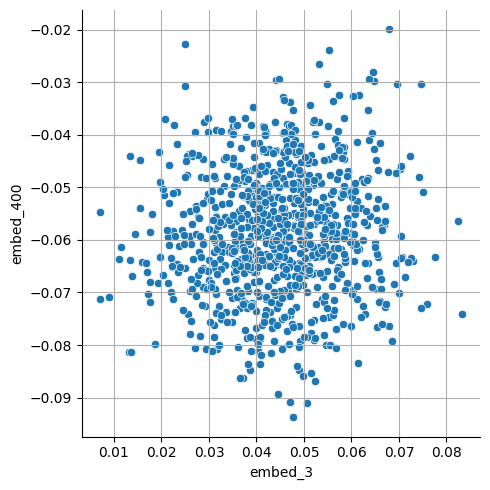

In [22]:
sns.relplot(data=df,x="embed_3",y="embed_400",kind="scatter")
plt.grid(True)

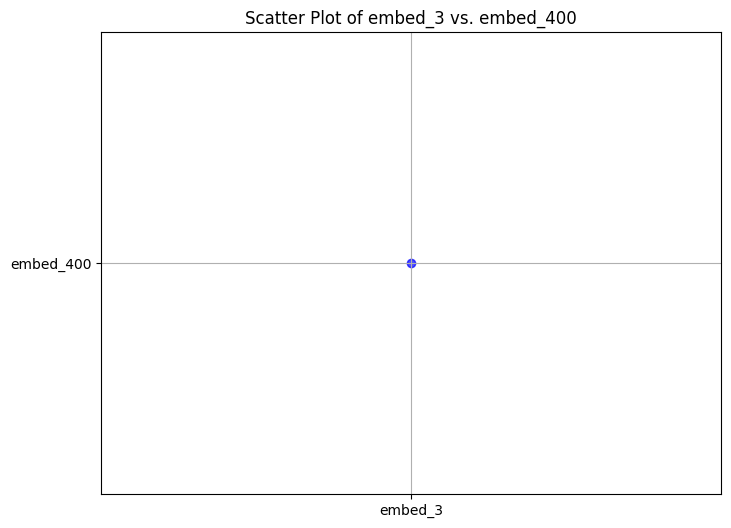

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter('embed_3','embed_400', c='blue', marker='o', alpha=0.7)
plt.title('Scatter Plot of embed_3 vs. embed_400')
plt.grid(True)
plt.show()

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df.iloc[:,5]  # Independent variable (feature)
y = df.iloc[:,400]
model = LinearRegression()
# Reshape the X array if it has only one feature
X = X.values.reshape(-1, 1)
y = y.values
model.fit(X, y)#fiting the model
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)#calculating mse
print(mse)


0.000136957117208154


In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.iloc[:,400]  # Independent variable (feature)
y = df.iloc[:,350]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LinearRegression model
model = LinearRegression()
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values
# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Get the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Printing the results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", coefficients)
print("Intercept:", intercept)



Mean Squared Error: 0.00014474932759097738
R^2 Score: 0.06650828375175633
Coefficients: [-0.18520004]
Intercept: -0.09589696620213004


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df.iloc[400]  # Independent variable (feature)
y = df.iloc[350]

